# CNN Training Notebook
This notebook trains a Convolutional Neural Network (CNN) to classify whether a face image has a mask or not using the MDMFR dataset.

In [1]:
import os
import cv2
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

## Step 1: Load Image Paths and Labels

In [2]:
path = "E:/publications/occlusion aware face recognition"
folders = ["final with mask", "final without mask"]
features, labels = [], []

for folder in folders:
    folder_path = os.path.join(path, folder)
    for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, filename)
        features.append(img_path)
        labels.append(0 if "without" in folder else 1.0)

data = pd.DataFrame({"features": features, "labels": labels})
data.to_csv(os.path.join(path, "face_mask_detection_data.csv"), index=False)

## Step 2: Load and Preprocess Images

In [3]:
images = []
for img_path in data["features"]:
    img = cv2.imread(img_path)
    img = cv2.resize(img, (50, 50))
    images.append(img)

X = np.array(images) / 255.0
y = to_categorical(np.array(data["labels"]))

## Step 3: Split Data

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

## Step 4: Define and Train CNN Model

In [5]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(50, 50, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

Epoch 1/10
395/395 [==============================] - 24s 48ms/step - loss: 0.1704 - accuracy: 0.9319 - val_loss: 0.0678 - val_accuracy: 0.9715
Epoch 2/10
395/395 [==============================] - 19s 48ms/step - loss: 0.0762 - accuracy: 0.9770 - val_loss: 0.0762 - val_accuracy: 0.9679
Epoch 3/10
395/395 [==============================] - 19s 48ms/step - loss: 0.0609 - accuracy: 0.9815 - val_loss: 0.0475 - val_accuracy: 0.9822
Epoch 4/10
395/395 [==============================] - 20s 50ms/step - loss: 0.0447 - accuracy: 0.9854 - val_loss: 0.0329 - val_accuracy: 0.9865
Epoch 5/10
395/395 [==============================] - 19s 49ms/step - loss: 0.0362 - accuracy: 0.9880 - val_loss: 0.0365 - val_accuracy: 0.9872
Epoch 6/10
395/395 [==============================] - 21s 53ms/step - loss: 0.0272 - accuracy: 0.9914 - val_loss: 0.0309 - val_accuracy: 0.9872
Epoch 7/10
395/395 [==============================] - 20s 51ms/step - loss: 0.0243 - accuracy: 0.9920 - val_loss: 0.0371 - val_accuracy:

## Step 5: Evaluate the Model

In [6]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

print(classification_report(y_true, y_pred_classes))

78/78 [==============================] - 1s 11ms/step
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1224
           1       1.00      0.99      0.99      1253

    accuracy                           0.99      2477
   macro avg       0.99      0.99      0.99      2477
weighted avg       0.99      0.99      0.99      2477



## Step 6: Confusion Matrix

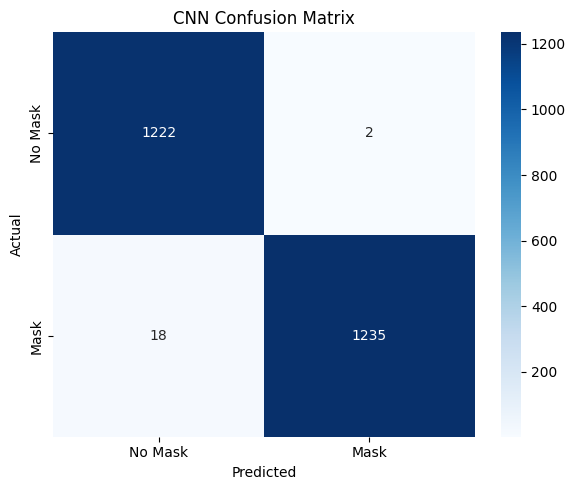

In [9]:
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Mask', 'Mask'], yticklabels=['No Mask', 'Mask'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('CNN Confusion Matrix')
plt.tight_layout()
plt.savefig("E:/edu/occlusion-aware-face-recognition/results/confusion_matrix_cnn.png")
plt.show()

## Step 7: Save the Model

In [8]:
model.save("E:/edu/occlusion-aware-face-recognition/models/cnn_model.h5")
print("Model saved as cnn_model.h5")

E:\edu\occlusion-aware-face-recognition\oafrenv\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved as cnn_model.h5
